### Regresión lineal en el conjunto de datos de vivienda de Boston

En mi blog anterior , cubrí los conceptos básicos de la regresión lineal y el descenso de gradientes. Para obtener una regresión lineal práctica, tomaremos un conjunto de datos original y aplicaremos los conceptos que hemos aprendido.
Tomaremos el conjunto de datos de Vivienda, que contiene información sobre D i casas ferentes en Boston. Estos datos originalmente formaban parte del Repositorio de aprendizaje automático de UCI y ahora se han eliminado. También podemos acceder a estos datos desde la biblioteca scikit-learn. Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas.
Entonces empecemos.

Primero, importaremos las bibliotecas necesarias.

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
1stFlrSF: First Floor square feet

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

LotFrontage: Linear feet of street connected to property


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

A continuación, cargaremos los datos de vivienda de la biblioteca scikit-learn y los entenderemos.

In [2]:
# Cargar los datos 
datos = np.load("proyecto_training_data.npy")
datosnumpy = np.load("proyecto_training_data.npy")
df=pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [3]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAD750AEC8>,
      dtype=object)

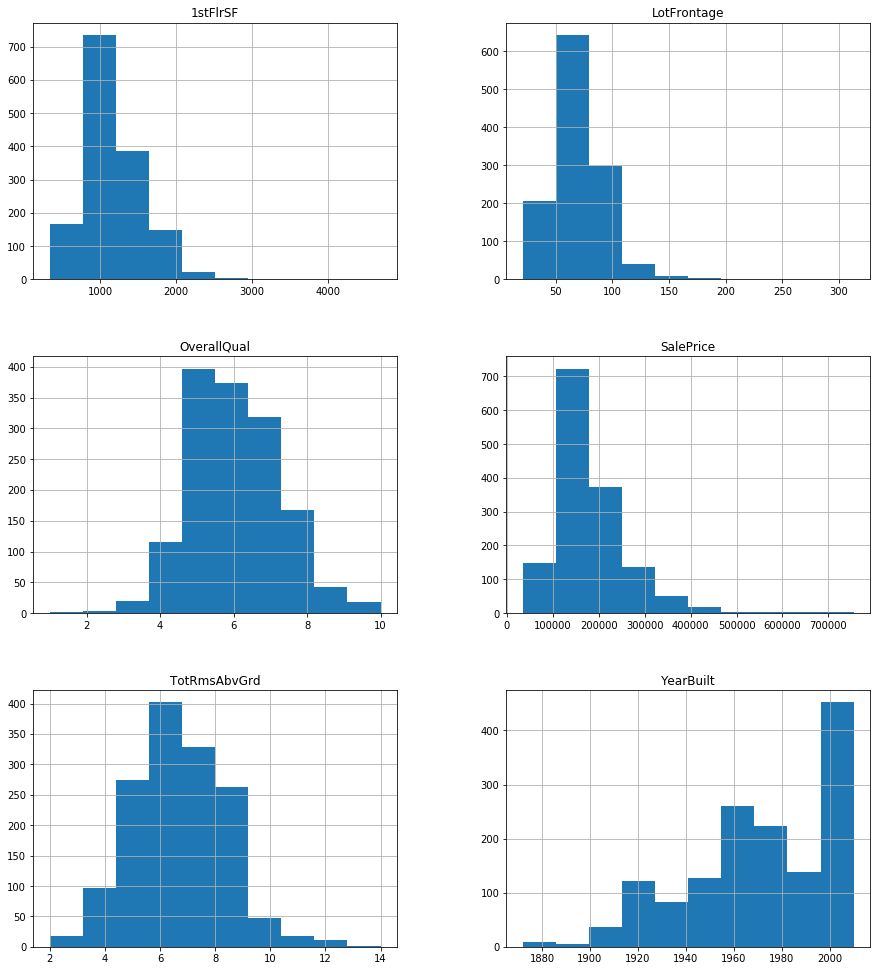

In [4]:
df.hist(figsize=(15,17))


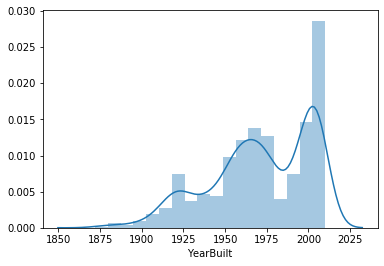

In [5]:
sns.distplot(df["YearBuilt"])

In [6]:
y=df["SalePrice"]

In [7]:
df.drop(["SalePrice"],axis=1,inplace=True) #quitamos la columna saleprice = y

In [9]:
X=datosnumpy[:,1:]
y=datosnumpy[:,0]
X.shape
#print(X.shape)

(1460, 5)

In [10]:
spl=0.8
n=len(y)
sample=int(spl*n)

X_train, X_test, y_train, y_test = X[:sample,:],X[sample:,:], y[:sample],y[sample:] # tomar de 0 a 80% - tomar de 80% en adelante 

In [11]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [12]:
oqtrain=X_train[:,0].reshape(-1,1)
oqtest=X_test[:,0].reshape(-1,1)
pisotrain=X_train[:,1].reshape(-1,1)
pisotest=X_test[:,1].reshape(-1,1)
cuartotrain=X_train[:,2].reshape(-1,1)
cuartotest=X_test[:,2].reshape(-1,1)
aniotrain=X_train[:,3].reshape(-1,1)
aniotest=X_test[:,3].reshape(-1,1)
piestrain=X_train[:,4].reshape(-1,1)
piestest=X_test[:,4].reshape(-1,1)

In [13]:
def funcion_costo(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def costo_gradiente(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def descenso_gradiente(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, 
                        max_iter=1000, imprimir_error_cada=None
                        ):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    n=len(X)
    columna_unos=np.ones((n,1))
    X = np.hstack((columna_unos,X))

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())

                
    return theta, costs, thetas, X

In [14]:
if imprimir_error_cada != None:
    if iteration%imprimir_error_cada == 0:
        print(costs[iteration])

NameError: name 'imprimir_error_cada' is not defined

In [15]:
valores_m=np.random.rand(2,1)
valores_m

array([[0.98754707],
       [0.08038974]])

In [24]:
thetas_arr, costs_arr, thetas1, x_procesado = descenso_gradiente(oqtrain,
                                                                    y_train, 
                                                                    valores_m, 
                                                                    funcion_costo, 
                                                                    costo_gradiente, 
                                                                    imprimir_error_cada=500)

In [25]:
thetas_arr

array([[ 19.0093724 ],
       [118.63692562]])

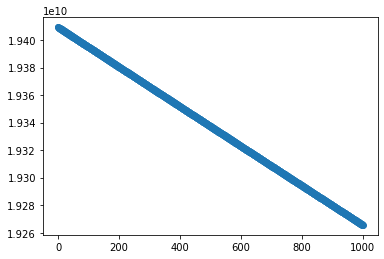

In [26]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs_arr)
plt.show()

In [27]:
costs_arr[-1]

19265643925.9322

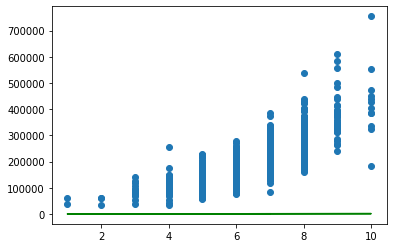

In [28]:
plt.scatter(x_procesado[:,1], y_train)
plt.plot(x_procesado[:,1], x_procesado @ thetas_arr, color='green')
plt.show()

# ---------------------------------------------------------------